## Fast Fourier Transform

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("data/extracted_eeg15.csv")
df.head()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4,state,epoch
0,0,40.821597,-55.720836,132.406203,-65.906920,-27.235861,7.739363,-0.103020,-42.830483,-16.779351,18.105731,-10.108818,15.131034,23.874840,-19.393478,focused,0
1,1,164.275699,-225.401365,533.689425,-265.215716,-109.811868,31.589598,-0.305979,-172.698659,-66.833721,73.032387,-41.106019,61.126783,95.936295,-78.276861,focused,0
2,2,252.201083,-350.066454,824.645749,-408.544243,-170.189040,49.851558,-0.561157,-266.739265,-99.321655,112.366766,-65.002391,94.192815,147.314882,-120.148647,focused,0
3,3,201.299424,-285.483140,670.948433,-330.759800,-140.280957,41.485909,-1.769399,-215.703902,-71.806241,89.031566,-55.911816,74.458805,117.688938,-93.197820,focused,0
4,4,151.189059,-213.813066,511.170971,-252.139256,-109.470773,30.539078,-3.822168,-161.832387,-47.651066,63.987032,-44.520633,52.789621,86.498565,-62.924980,focused,0


In [33]:
df.describe()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4,epoch
count,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000
mean,117185.500000,-0.000796,0.001664,-0.000426,-0.000771,-0.000737,0.001404,0.003138,0.001228,-0.000156,-0.000624,-0.000891,-0.000987,-0.002299,0.000252,915.015633
std,67657.512983,6.820961,6.506749,9.732587,7.071858,6.622523,9.622508,9.480014,10.398798,8.031284,6.130513,8.721106,6.062143,6.259187,7.355975,528.574256
min,0.000000,-250.272950,-350.066454,-266.167796,-408.544243,-249.169179,-76.796953,-74.159925,-266.739265,-99.321655,-251.027099,-1631.444418,-251.027098,-251.665952,-120.148647,0.000000
25%,58592.750000,-3.771793,-3.678801,-4.559432,-3.836912,-3.864927,-5.181541,-5.367281,-5.475723,-4.792199,-3.524329,-3.659640,-3.490930,-3.577444,-4.487228,457.000000
50%,117185.500000,0.025518,0.006329,-0.027069,0.035489,0.084119,0.024576,0.067148,0.036545,-0.020094,0.015097,0.008275,0.007605,0.009008,-0.025582,915.000000
75%,175778.250000,3.768930,3.681789,4.533321,3.862095,3.938184,5.231562,5.421540,5.518093,4.780645,3.534404,3.642907,3.492689,3.585261,4.460426,1373.000000
max,234371.000000,329.263468,257.312939,824.645749,136.332423,142.437287,244.267416,226.956244,251.371775,284.108234,136.425810,611.291082,94.192815,147.314882,261.584540,1831.000000


In [34]:
# setting
fs = 128

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Function to Visualize
def viz_fft(eeg_data, channel, state, epoch=0, fs=128):
    data = eeg_data.copy()
    data = data[data['state'] == state]
    data['epoch'] = np.arange(len(data)) // fs

    data = eeg_data[eeg_data['epoch'] == epoch][channel]
    # Apply FFT
    fft_data = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data), d=1/fs)

    # Take only positive frequencies
    positive_freqs = freqs[freqs >= 0]
    positive_fft_data = np.abs(fft_data[freqs >= 0])

    # Plot
    plt.plot(positive_freqs, positive_fft_data)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    # plt.show()

def viz_nepochs_state(channel, num_epochs, state):
    plt.figure(figsize=(12,10))
    for i in range(1, num_epochs+1):
        plt.subplot(num_epochs, 1, i)
        viz_fft(df, channel, state, i)
    plt.tight_layout()
    plt.show()

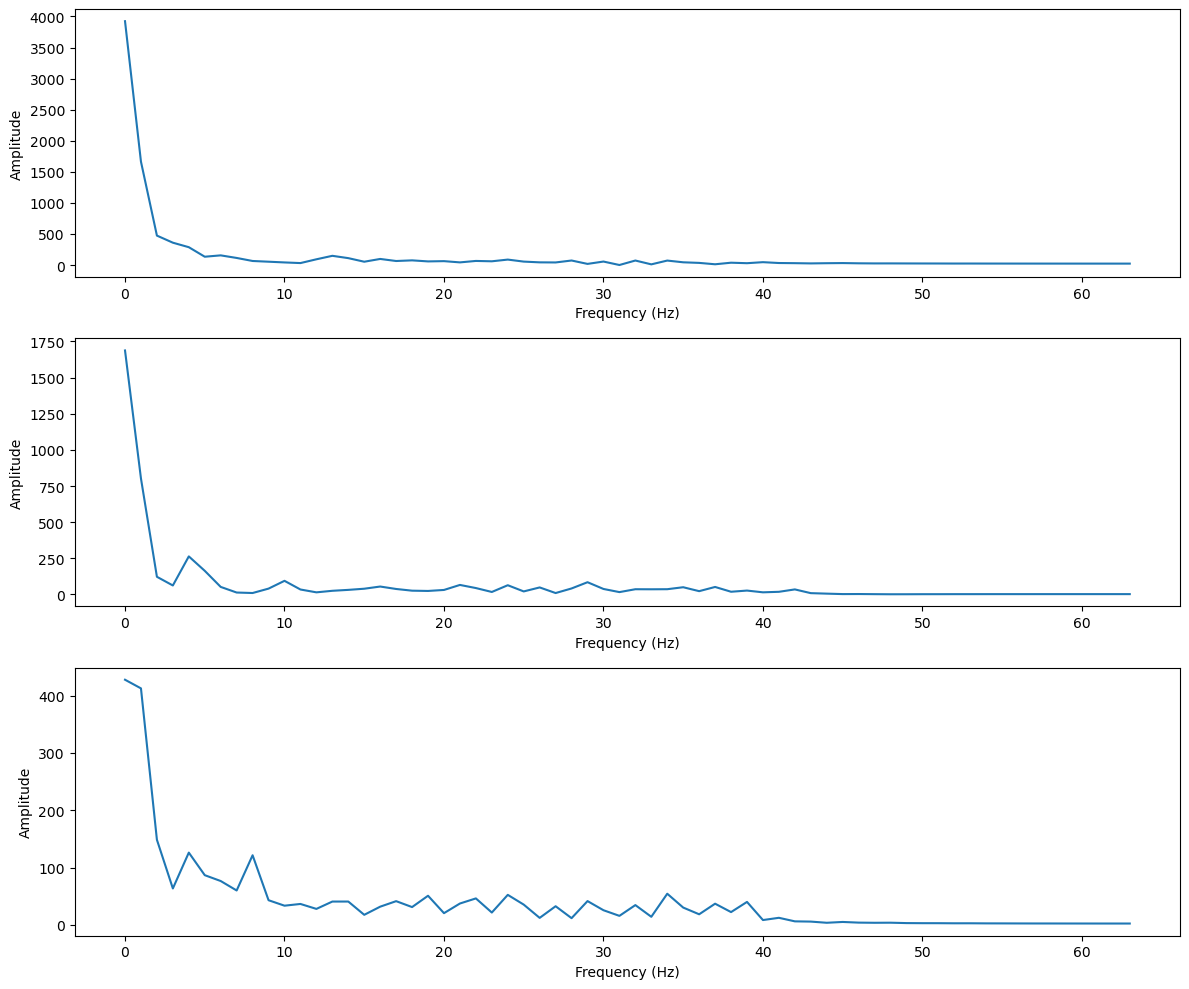

In [36]:
# Test with channel ED_F7 with 3 epochs, focused state
channel = 'ED_F7'
num_epochs = 3

viz_nepochs_state(channel, num_epochs, state='focused')

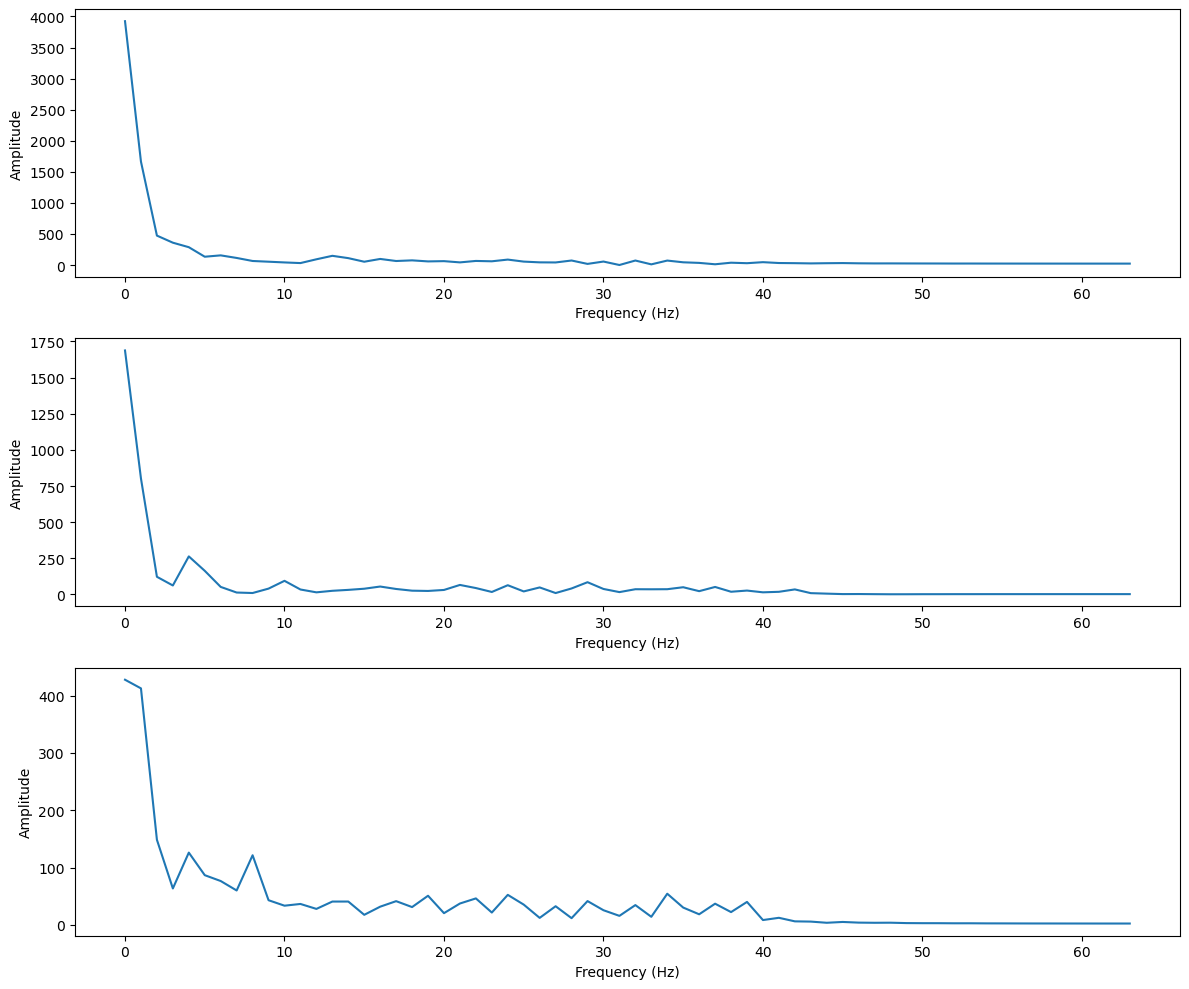

In [37]:
# Test with channel ED_F7 with 3 epochs, unfocused state
viz_nepochs_state(channel, num_epochs, state='unfocused')

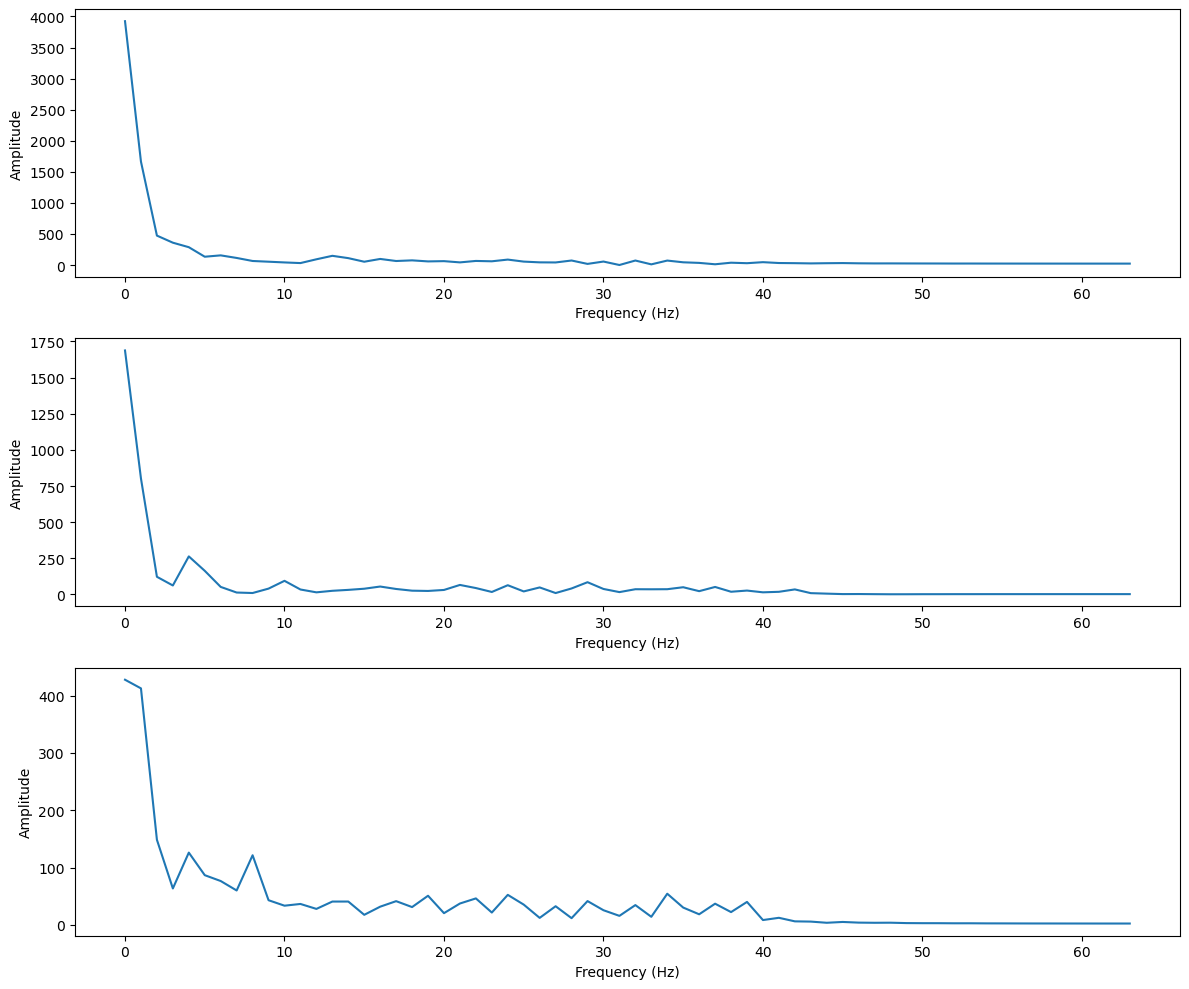

In [38]:
# Test with channel ED_F7 with 3 epochs, drownsy state

viz_nepochs_state(channel, num_epochs, state='drownsy')

In [39]:
# useful channel
useful_channels = ['ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4']
# then useful_columns is 
useful_columns = ['t', 'ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4', 'state', 'epoch']

In [40]:
df = df[useful_columns]
df.head()

,t,ED_F7,ED_F3,ED_P7,ED_O1,ED_O2,ED_P8,ED_AF4,state,epoch
0,0,-55.720836,132.406203,7.739363,-0.103020,-42.830483,-16.779351,-19.393478,focused,0
1,1,-225.401365,533.689425,31.589598,-0.305979,-172.698659,-66.833721,-78.276861,focused,0
2,2,-350.066454,824.645749,49.851558,-0.561157,-266.739265,-99.321655,-120.148647,focused,0
3,3,-285.483140,670.948433,41.485909,-1.769399,-215.703902,-71.806241,-93.197820,focused,0
4,4,-213.813066,511.170971,30.539078,-3.822168,-161.832387,-47.651066,-62.924980,focused,0


Thử trích xuất đặc trưng để dễ hình dung:
- **Power spectral density (PSD):** Tổng công suất trong từng dải sóng (delta, theta, alpha, beta, gamma)
- **Relative power:** tỷ lệ công suất của từng dải sóng đối với tổng công suất
- **Peak Frequency:** tần số tại điểm có biên độ lớn nhất
- **Band ratios:** Tỷ lệ giữa các dải sóng (ví dụ beta/alpha)

Sẽ tìm hiểu các features khác và thêm vào sau

In [ ]:
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 50) # max is 50 because this is preprocessed data
}

fs = 128
num_channels = len(useful_channels)
epoch_length = 128
len_data = len(df)
feature_matrix = []
labels = []

for i in range(0, len_data, epoch_length):
    epoch_data = df.iloc[i:min(i+epoch_length, len_data), 1:num_channels+1].values\
    # remove last epoch
    if len(epoch_data) != epoch_length:
        continue
    label = df.iloc[i, -2] # state to epoch -> -2
    epoch_features = []
    
    # Apply FFT once for the entire epoch
    fft_data = np.fft.fft(epoch_data, axis=0)
    freqs = np.fft.fftfreq(epoch_length, d=1/fs)
    
    # Take only positive frequencies
    positive_freqs = freqs[freqs >= 0]
    positive_fft_data = np.abs(fft_data[freqs >= 0, :])
    
    for channel in range(num_channels):
        channel_fft_data = positive_fft_data[:, channel]
        
        # calculate PSD 
        delta_power_sum = np.sum(channel_fft_data[(positive_freqs >= bands['delta'][0]) & (positive_freqs < bands['delta'][1])][:len(channel_fft_data)])
        theta_power_sum = np.sum(channel_fft_data[(positive_freqs >= bands['theta'][0]) & (positive_freqs < bands['theta'][1])][:len(channel_fft_data)])
        alpha_power_sum = np.sum(channel_fft_data[(positive_freqs >= bands['alpha'][0]) & (positive_freqs < bands['alpha'][1])][:len(channel_fft_data)])
        beta_power_sum = np.sum(channel_fft_data[(positive_freqs >= bands['beta'][0]) & (positive_freqs < bands['beta'][1])][:len(channel_fft_data)])
        gamma_power_sum = np.sum(channel_fft_data[(positive_freqs >= bands['gamma'][0]) & (positive_freqs < bands['gamma'][1])][:len(channel_fft_data)])

        # relative power
        total_power = delta_power_sum + theta_power_sum + alpha_power_sum + beta_power_sum + gamma_power_sum
        delta_rate = delta_power_sum / total_power
        theta_rate = theta_power_sum / total_power
        alpha_rate = alpha_power_sum / total_power
        beta_rate = beta_power_sum / total_power
        gamma_rate = gamma_power_sum / total_power

        # peak frequency
        freq_id = np.argmax(channel_fft_data)
        peak_freq = positive_freqs[freq_id]

        epoch_features.extend([
            delta_power_sum, theta_power_sum, alpha_power_sum, beta_power_sum, gamma_power_sum,
            delta_rate, theta_rate, alpha_rate, beta_rate, gamma_rate,
            peak_freq
        ])

    feature_matrix.append(epoch_features)
    labels.append(label)

# Chuyển sang numpy array
X = np.array(feature_matrix)
y = np.array(labels)

In [48]:
X.shape, y.shape

((1831, 77), (1831,))

## Apply thử mô hình cơ bản

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
label_encoder = LabelEncoder()

X_scaled = scaler.fit_transform(X)
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [55]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

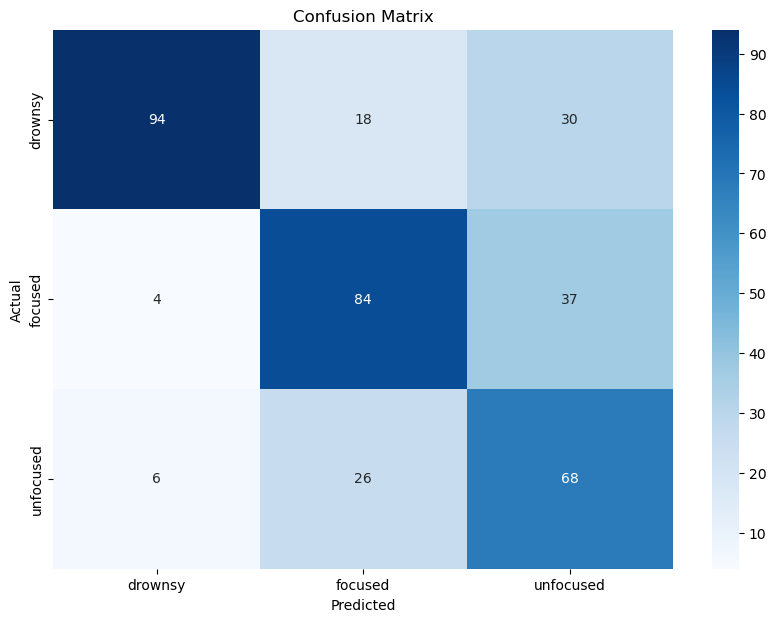

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()